<a href="https://colab.research.google.com/github/aks2093/Face-Similarity-with-less-data/blob/master/Face_Similarity.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Problem Statement**: 
Given a pair of face images, Find out the similarity between those two images in the pair.

# Data Exploration

**Few Details of data**

I collected random images of below celebrities:

1. Ben Affleck
2. Elton John
3. Jerry Seinfeld
4. Madonna
5. Mindy Kaling

**Structure of CSV file:**


In [ ]:
import pandas as pd
import os
path = "/content/drive/My Drive/face_similarity"
csv_file = os.path.join(path, "csv","combined.csv")
data_df = pd.read_csv(csv_file)
print(data_df.columns)

Index(['image1', 'image2', 'is_similar'], dtype='object')


**image1**: path for image1

**image2**: path for image2

**is_similar**: tells whether two images(image1 and image2) are similar or not



Below code is to Visualizing 10 sample pair of images 

if "Label"=1 then images in pair are similar

if "Label"=0 then images in pair are not similar(dissimilar)

In [ ]:
print("Number of 1's(similar images) in data csv: ", data_df[data_df["is_similar"]==1].__len__())
print("Number of 0's(dissimilar images) in data csv: ", data_df[data_df["is_similar"]==1].__len__())

Number of 1's(similar images) in data csv:  180
Number of 0's(dissimilar images) in data csv:  180


**Generate few image pairs**

In [ ]:
import keras
import numpy as np
import pandas as pd
from keras import backend as K
import random
import os
import cv2

path = "/content/drive/My Drive/face_similarity"

def create_pairs(data_frame, path, folder="generated_data"):
    pairs = []
    labels = []
    counter = 0

    for index, row in data_frame.iterrows():
        # print("Image Count: {}".format(counter))
        image1_path = os.path.join(path, folder, row["image1"])
        # print(image1_path)
        image1 = cv2.imread(image1_path)
        # image1 = cv2.cvtColor(image1, cv2.COLOR_BGR2GRAY)
        image1 = cv2.resize(image1,(150, 150))
        # image1 = image1/255.0

        image2_path = os.path.join(path, folder, row["image2"])
        image2 = cv2.imread(image2_path)
        # image2 = cv2.cvtColor(image2, cv2.COLOR_BGR2GRAY)
        image2 = cv2.resize(image2,(150, 150))
        # image2 = image2/255.0

        print(image1_path)
        print(image2_path)
        print(row["is_similar"])
        # print("***********************************************")

        labels += [int(row["is_similar"])]
        pairs += [[image1, image2]]
        if counter == 10:
            break
        counter += 1

    return np.array(pairs), np.array(labels)


train_csv_path = os.path.join(path, "csv","combined.csv")
print("train_data.csv read")
train_df = pd.read_csv(train_csv_path, names=["image1","image2","is_similar"])
train_df = train_df.sample(frac=1)
train_pairs, train_y = create_pairs(train_df, path)

train_data.csv read
/content/drive/My Drive/face_similarity/generated_data/ben_afflek/httpafilesbiographycomimageuploadcfillcssrgbdprgfacehqwMTENDgMDUODczNDcNTcjpg.jpg
/content/drive/My Drive/face_similarity/generated_data/ben_afflek/httpimagesfandangocomrImageRendererredesignstaticimgnoxportraitjpgpcpcpcimagesmasterrepositoryperformerimagespjpg.jpg
1
/content/drive/My Drive/face_similarity/generated_data/jerry_seinfeld/httpsuswestamazonawscomblogsprodmediausuploadsJerrySeinfeldkidsxjpg.jpg
/content/drive/My Drive/face_similarity/generated_data/mindy_kaling/httpmediaonsugarcomfilesbabaaaaaMindyInterviewxxxlargejpg.jpg
0
/content/drive/My Drive/face_similarity/generated_data/elton_john/httpafilesbiographycomimageuploadcfillcssrgbdprgfacehqwMTEODAOTcxNjcMjczMjkzjpg.jpg
/content/drive/My Drive/face_similarity/generated_data/mindy_kaling/httpgraphicsnytimescomimagesmagazinekalingkalingarticleInlinejpg.jpg
0
/content/drive/My Drive/face_similarity/generated_data/madonna/httpresizeparismatch

**Visualizing those image pairs**

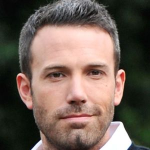

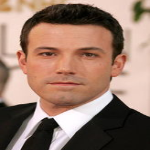

is_similar:  1
**************************


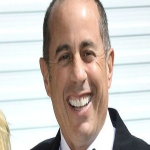

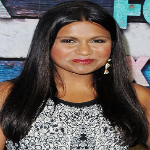

is_similar:  0
**************************


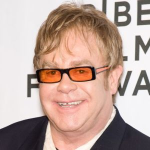

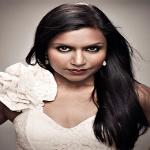

is_similar:  0
**************************


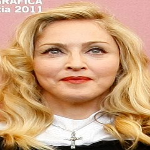

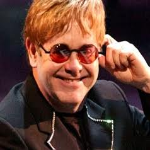

is_similar:  0
**************************


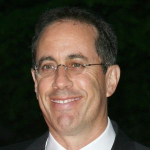

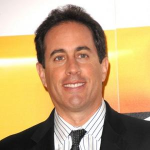

is_similar:  1
**************************


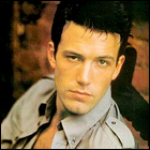

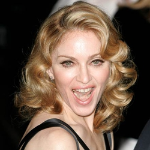

is_similar:  0


In [ ]:
from google.colab.patches import cv2_imshow
cv2_imshow(train_pairs[:,0][0])
cv2_imshow(train_pairs[:,1][0])
print("is_similar: ", train_y[0])
print("**************************")
cv2_imshow(train_pairs[:,0][1])
cv2_imshow(train_pairs[:,1][1])
print("is_similar: ", train_y[1])
print("**************************")
cv2_imshow(train_pairs[:,0][2])
cv2_imshow(train_pairs[:,1][2])
print("is_similar: ", train_y[2])
print("**************************")
cv2_imshow(train_pairs[:,0][3])
cv2_imshow(train_pairs[:,1][3])
print("is_similar: ", train_y[3])
print("**************************")
cv2_imshow(train_pairs[:,0][4])
cv2_imshow(train_pairs[:,1][4])
print("is_similar: ", train_y[4])
print("**************************")
cv2_imshow(train_pairs[:,0][5])
cv2_imshow(train_pairs[:,1][5])
print("is_similar: ", train_y[5])

**Define Utility Functions**

In [ ]:
def euclidean_distance(vect1, vect2):
    x, y = vect1, vect2
    sum_square = K.sum(K.square(x - y), axis=1, keepdims=True)
    return K.sqrt(K.maximum(sum_square, K.epsilon()))

def eucl_dist_output_shape(shapes):
    shape1, shape2 = shapes
    return (shape1[0], 1)

def compute_accuracy(y_true, y_pred):
    pred = y_pred.ravel() > 0.5
    return np.mean(pred == y_true)

def accuracy(y_true, y_pred):
    return K.mean(K.equal(y_true, K.cast(y_pred > 0.5, y_true.dtype)))

def contrastive_loss(y_true, y_pred):
    margin = 1
    square_pred = K.square(y_pred)
    margin_square = K.square(K.maximum(margin - y_pred, 0))
    return K.mean(y_true * square_pred + (1 - y_true) * margin_square)

# **First Model Architecture(Model1)**

Lets approach with the concept of Siamese Network to find the similarity between 2 given images

We will follow below DL model architecture



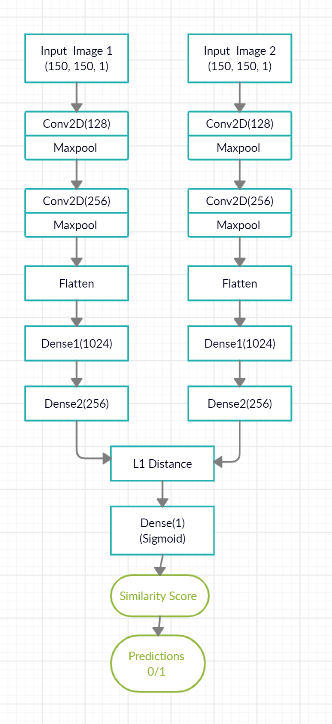

train_data.csv read
Index(['image1', 'image2', 'is_similar'], dtype='object')
Training Pairs Created
Train data shape is:  (360, 2, 150, 150)
Model: "functional_11"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_11 (InputLayer)           [(None, 150, 150, 1) 0                                            
__________________________________________________________________________________________________
input_12 (InputLayer)           [(None, 150, 150, 1) 0                                            
__________________________________________________________________________________________________
sequential_4 (Sequential)       (None, 256)          321686272   input_11[0][0]                   
                                                                 input_12[0][0]                   
___________________________________________

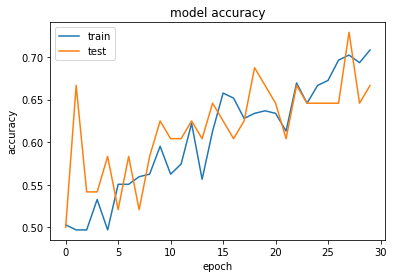

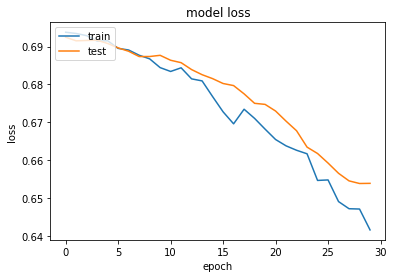

In [ ]:
import keras
from keras.layers import Conv2D, Dropout, Flatten, Dense, MaxPooling2D, SpatialDropout2D, Lambda, Input, BatchNormalization
from keras.models import Model
from keras.utils.vis_utils import plot_model
import numpy as np
import pandas as pd
from keras import backend as K
import random
import os
import cv2
from keras.optimizers import SGD, Adam
from sklearn.utils import shuffle

num_classes = 2
epochs = 30
path = "/content/drive/My Drive/face_similarity"

sgd = SGD(lr=0.01)
adam = Adam(lr=0.000001)


def create_pairs(data_frame, path, folder="generated_data"):
    pairs = []
    labels = []
    counter = 0

    for index, row in data_frame.iterrows():
        image1_path = os.path.join(path, folder, row["image1"])
        image2_path = os.path.join(path, folder, row["image2"])
        if ".jpg" in image1_path and ".jpg" in image2_path:
            image1 = cv2.imread(image1_path)
            image1_gray = cv2.cvtColor(image1, cv2.COLOR_BGR2GRAY)
            image1 = cv2.resize(image1_gray,(150, 150))
            image1 = image1/255.0
        
            image2 = cv2.imread(image2_path)
            image2_gray = cv2.cvtColor(image2, cv2.COLOR_BGR2GRAY)
            image2 = cv2.resize(image2_gray,(150, 150))
            image2 = image2/255.0

            labels += [int(row["is_similar"])]
            pairs += [[image1, image2]]

    return np.array(pairs), np.array(labels)
  


train_csv_path = os.path.join(path,"csv", "combined.csv")
print("train_data.csv read")
train_df = pd.read_csv(train_csv_path, names=["image1", "image2", "is_similar"])
train_df = train_df.sample(frac=1)
print(train_df.columns)
train_pairs, train_y = create_pairs(train_df, path)
print("Training Pairs Created")
print("Train data shape is: ", train_pairs.shape)

input_shape=(150, 150, 1)

left_input = Input(shape=input_shape)
right_input = Input(shape=input_shape)

base_model  = keras.Sequential()

base_model.add(Conv2D(128, kernel_size=3, input_shape=input_shape, strides=1, activation="relu"))
base_model.add(MaxPooling2D(pool_size=3, strides=2))
# base_model.add(SpatialDropout2D(rate=0.2))

base_model.add(Conv2D(256, kernel_size=3, strides=1, activation="relu"))
base_model.add(MaxPooling2D(pool_size=3, strides=2))
base_model.add(SpatialDropout2D(rate=0.2))


base_model.add(Flatten())
base_model.add(Dense(1024, activation='relu'))
base_model.add(Dropout(rate=0.2))

base_model.add(Dense(256, activation="relu"))

encoded_l = base_model(left_input)
encoded_r = base_model(right_input)

L1_layer = Lambda(lambda tensors:K.abs(tensors[0] - tensors[1]))
L1_distance = L1_layer([encoded_l, encoded_r])
# L2_distance = euclidean_distance(encoded_l, encoded_r)

prediction = Dense(1,activation='sigmoid')(L1_distance)
# prediction = Dense(1,activation='sigmoid')(L2_distance)
model = Model(inputs=[left_input,right_input],outputs=prediction)

plot_model(model, to_file='model.png')

early_stopping_callback=keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

model.compile(loss="binary_crossentropy", optimizer=adam, metrics=[accuracy])
print(model.summary())

model_history = model.fit([train_pairs[:, 0].reshape(-1, 150,150, 1), train_pairs[:, 1].reshape(-1, 150, 150, 1)], train_y,
          batch_size=16,
          epochs=epochs,
          validation_split=0.1, 
          callbacks=[early_stopping_callback])

# model.save(os.path.join(path,'face_similarity_model_sigmoid.h5'))



import matplotlib.pyplot as plt
# summarize history for accracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
plt.savefig(os.path.join(path,"accuracy_sigmoid.png"))
plt.close()

# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
plt.savefig(os.path.join(path,"loss_sigmoid.png"))
plt.close()


By Observing above values of loss and accuracies for train and test , it is clear that model is highly unstable(High Bias) and it shows lot of fluctuations in graph of accuracy. Model is unable to learn the patterns due to lack of data to train on(in our case its 180 images per class). Also It is just better than random guess.

So lets try with another approach instead of using convolution layers(that need lot of data to learn patterns in the images) we would use HOG features.

# **Using HOG Features(Model2)**




**Idea**: 

HOG features will be extracted from each image in the pair and they will be passed through the DL network described below:

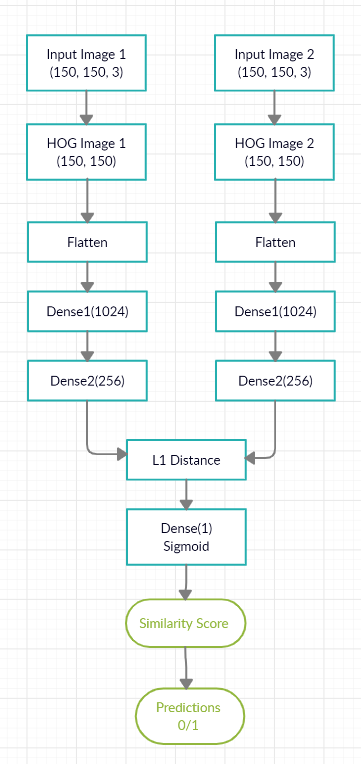

train_data.csv read
Index(['image1', 'image2', 'is_similar'], dtype='object')
Training Pairs Created
Train data shape is:  (360, 2, 150, 150)
Model: "functional_13"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_13 (InputLayer)           [(None, 150, 150, 1) 0                                            
__________________________________________________________________________________________________
input_14 (InputLayer)           [(None, 150, 150, 1) 0                                            
__________________________________________________________________________________________________
sequential_5 (Sequential)       (None, 256)          23303424    input_13[0][0]                   
                                                                 input_14[0][0]                   
___________________________________________

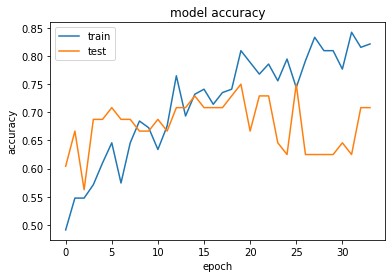

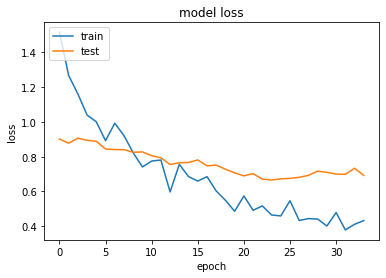

In [ ]:
from skimage.feature import hog
from skimage.transform import resize
from skimage.io import imread, imshow

epochs = 40
def create_pairs(data_frame, path, folder="generated_data"):
    pairs = []
    labels = []
    counter = 0

    for index, row in data_frame.iterrows():
        image1_path = os.path.join(path, folder, row["image1"])
        image2_path = os.path.join(path, folder, row["image2"])
        if ".jpg" in image1_path and ".jpg" in image2_path:
            image1 = cv2.imread(image1_path)
            image1 = cv2.resize(image1,(150, 150))
            fd, hog_image1 = hog(image1, orientations=9, pixels_per_cell=(16, 16), cells_per_block=(1, 1), visualize=True, multichannel=True)
        
            image2 = cv2.imread(image2_path)
            image2 = cv2.resize(image2,(150, 150))
            fd, hog_image2 = hog(image2, orientations=9, pixels_per_cell=(16, 16), cells_per_block=(1, 1), visualize=True, multichannel=True)

            labels += [int(row["is_similar"])]
            pairs += [[hog_image1, hog_image2]]

    return np.array(pairs), np.array(labels)


train_csv_path = os.path.join(path,"csv", "combined.csv")
print("train_data.csv read")
train_df = pd.read_csv(train_csv_path, names=["image1", "image2", "is_similar"])
train_df = train_df.sample(frac=1)
print(train_df.columns)
train_pairs, train_y = create_pairs(train_df, path)
print("Training Pairs Created")
print("Train data shape is: ", train_pairs.shape)


left_input = Input(shape=input_shape)
right_input = Input(shape=input_shape)

base_model  = keras.Sequential()
base_model.add(Flatten())
base_model.add(Dense(1024, activation='relu'))
base_model.add(Dropout(rate=0.2))
base_model.add(Dense(256, activation="relu"))

encoded_l = base_model(left_input)
encoded_r = base_model(right_input)

L1_layer = Lambda(lambda tensors:K.abs(tensors[0] - tensors[1]))
L1_distance = L1_layer([encoded_l, encoded_r])

prediction = Dense(1,activation='sigmoid')(L1_distance)
model = Model(inputs=[left_input,right_input],outputs=prediction)

early_stopping_callback=keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

model.compile(loss="binary_crossentropy", optimizer=adam, metrics=[accuracy])
print(model.summary())

model_history = model.fit([train_pairs[:, 0].reshape(-1, 150,150, 1), train_pairs[:, 1].reshape(-1, 150, 150, 1)], train_y,
          batch_size=16,
          epochs=epochs,
          validation_split=0.1, 
          callbacks=[early_stopping_callback])

# model.save(os.path.join(path,'face_similarity_hog_model_sigmoid.h5'))


import matplotlib.pyplot as plt
# summarize history for accracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
plt.savefig(os.path.join(path,"accuracy_sigmoid.png"))
plt.close()

# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
plt.savefig(os.path.join(path,"loss_sigmoid.png"))
plt.close()



As we can see from above values of losses and accuracy that now by using HOG features in the model our performance metrics are improved but it is clearly seen that our model has considerablely low accuracy on validation data relative to train data(Variance increases in model) and here are lot of fluctuations in the validation accuracy values towards the end of the epochs so model is being bit unstable. Bias and variance are improved relative to model1 but still they are high.

So If we introduce some dropout or batchnormalization(to handle variance) then it was observed that performance on both train and validation data gets degraded (Bias increases in model). Hence this makes our model quite unstable

The reason of this behaviour of the model is lack of the to train on(here we have only 180 images per class)

So to maintain this Bias-Variance tradeoff and to make model more stable we need to approach in the following way.

# **Using Transfer Learning**

So as we have observed in the HOG-Model approach that model is having Bias-Variance problem and is quite unstable so to overcome these drawbacks lets proceed with transfer learning when we can use the results of pretrained models to get the better features or encodings from the input image.

will use below 2 models for transfer learning

1. InceptionV3
2. VGG16

# Using InceptionV3 Model(Model3)


**Idea**:  will freeze the all layers of pre-trained InceptionV3 except last 30 layers, will fine tune them on our data and will add some custom layers to it.

Please find the network details below

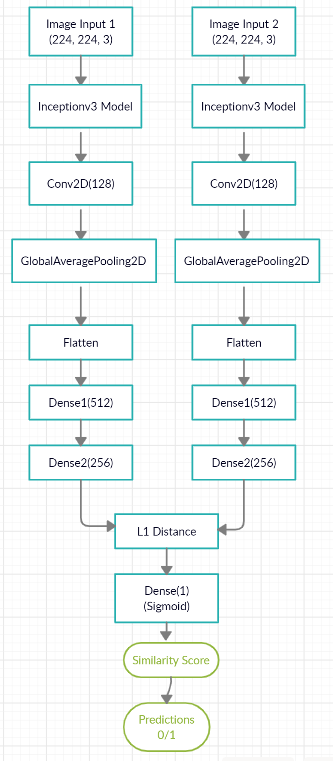

87916544/87910968 [==============================] - 1s 0us/step
train_data.csv read
Index(['image1', 'image2', 'is_similar'], dtype='object')
Model: "functional_5"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_5 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
input_6 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
sequential_2 (Sequential)       (None, 256)          24359584    input_5[0][0]                    
                                                                 input_6[0][0]                    
___________________________________________

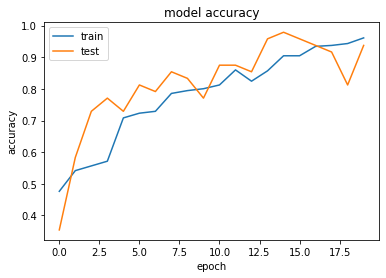

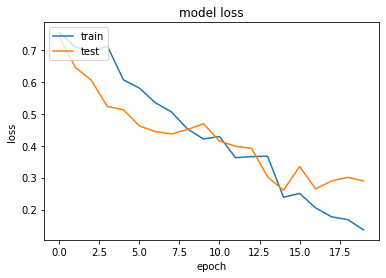

In [ ]:
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.applications.vgg16 import VGG16
from keras.applications.inception_v3 import InceptionV3
from keras.applications.inception_v3 import preprocess_input
from keras.utils.vis_utils import plot_model
from keras.models import Sequential
import keras
from keras.layers import Conv2D, Dropout, Flatten, Dense, MaxPooling2D, SpatialDropout2D, Lambda, Input, BatchNormalization, GlobalAveragePooling2D
from keras.models import Model
import numpy as np
import pandas as pd
from keras import backend as K
import random
import os
import cv2
from keras.optimizers import SGD, Adam
from sklearn.utils import shuffle

num_classes = 2
epochs = 30
path = "/content/drive/My Drive/face_similarity"

sgd = SGD(lr=0.01)
adam = Adam(lr=0.0001)

img_shape = (224, 224, 3)
left_input = Input(shape=img_shape)
right_input = Input(shape=img_shape)

inception = InceptionV3(weights = 'imagenet',
              include_top = False,
              input_shape = img_shape)

# summarize the model
plot_model(inception, to_file='inception.png')
# inception.summary()
# Freeze the layers except the last 30 layers
for layer in inception.layers[:-30]:
    layer.trainable = False


def create_pairs(data_frame, path, folder="generated_data"):
    pairs = []
    labels = []
    counter = 0

    for index, row in data_frame.iterrows():
        image1_path = os.path.join(path, folder, row["image1"])
        image2_path = os.path.join(path, folder, row["image2"])
        if ".jpg" in image1_path and ".jpg" in image2_path:
            image1 = load_img(image1_path, target_size=(img_shape[0], img_shape[1]))
            image1 = img_to_array(image1)
            image1 = image1.reshape((1, image1.shape[0], image1.shape[1], image1.shape[2]))
            image1 = preprocess_input(image1)
        
            image2 = load_img(image2_path, target_size=(img_shape[0], img_shape[1]))
            image2 = img_to_array(image2)
            image2 = image2.reshape((1, image2.shape[0], image2.shape[1], image2.shape[2]))
            image2 = preprocess_input(image2)

            labels += [int(row["is_similar"])]
            pairs += [[image1, image2]]

    return np.array(pairs), np.array(labels)


train_csv_path = os.path.join(path,"csv", "combined.csv")
print("train_data.csv read")
train_df = pd.read_csv(train_csv_path, names=["image1", "image2", "is_similar"])
train_df = train_df.sample(frac=1)
print(train_df.columns)
train_pairs, train_y = create_pairs(train_df, path)

base_model = Sequential()
base_model.add(inception)
base_model.add(Conv2D(128, 3, activation='relu'))
base_model.add(Dropout(0.5))
base_model.add(GlobalAveragePooling2D())
base_model.add(Flatten())
base_model.add(Dense(512, activation='relu'))
base_model.add(Dropout(0.5))
base_model.add(Dense(256, activation='relu'))


encoded_l = base_model(left_input)
encoded_r = base_model(right_input)

L1_layer = Lambda(lambda tensors:K.abs(tensors[0] - tensors[1]))
L1_distance = L1_layer([encoded_l, encoded_r])

prediction = Dense(1,activation='sigmoid')(L1_distance)
model = Model(inputs=[left_input,right_input],outputs=prediction)

early_stopping_callback=keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)

model.compile(loss="binary_crossentropy", optimizer=adam, metrics=[accuracy])
print(model.summary())

model_history = model.fit([train_pairs[:, 0].reshape(-1, 224,224, 3), train_pairs[:, 1].reshape(-1, 224, 224, 3)], train_y,
          batch_size=16,
          epochs=epochs,
          validation_split=0.1, 
          callbacks=[early_stopping_callback])

# model.save(os.path.join(path,'face_similarity_inception_model_sigmoid.h5'))

import matplotlib.pyplot as plt
# summarize history for accracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
plt.savefig(os.path.join(path,"accuracy_sigmoid.png"))
plt.close()

# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
plt.savefig(os.path.join(path,"loss_sigmoid.png"))
plt.close()


# Using VGG16(Model4)


**Idea**: Use pretrained VGG16 model till "block5_pool" layer and then add few more custom layers to it so that we can use the features or encodings coming from VGG16 model to our custom network layer as input. 

Please find the nework details below

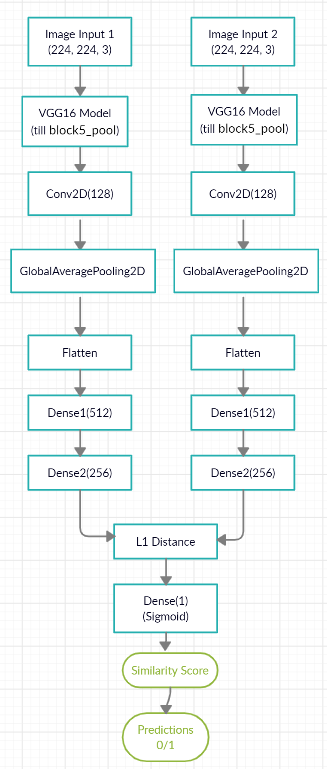



553467904/553467096 [==============================] - 6s 0us/step
Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_10 (InputLayer)        [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
____________________________________________________________

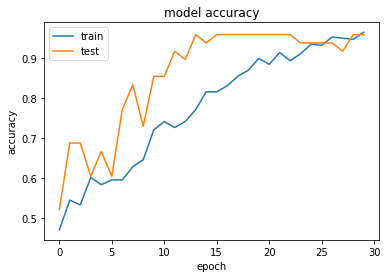

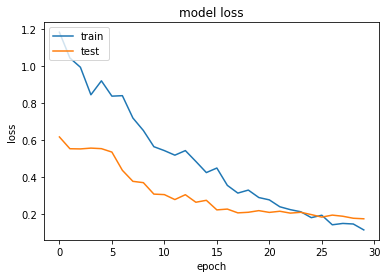

In [ ]:
from keras.applications.vgg16 import VGG16
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.applications.vgg16 import preprocess_input
from keras.applications.vgg16 import decode_predictions
from keras.utils.vis_utils import plot_model
from keras.models import Sequential
import keras
from keras.layers import Conv2D, Dropout, Flatten, Dense, MaxPooling2D, SpatialDropout2D, Lambda, Input, BatchNormalization, GlobalAveragePooling2D
from keras.models import Model
import numpy as np
import pandas as pd
from keras import backend as K
import random
import os
import cv2
from keras.optimizers import SGD, Adam
from sklearn.utils import shuffle

num_classes = 2
epochs = 30
path = "/content/drive/My Drive/face_similarity"

sgd = SGD(lr=0.01)
adam = Adam(lr=0.0001)

img_shape = (224, 224, 3)
left_input = Input(shape=img_shape)
right_input = Input(shape=img_shape)

vgg16 = VGG16()
vgg16.summary()
for layer in vgg16.layers[:-5]:
    layer.trainable = False

def create_pairs(data_frame, path, folder="generated_data"):
    pairs = []
    labels = []
    counter = 0

    for index, row in data_frame.iterrows():
        image1_path = os.path.join(path, folder, row["image1"])
        image2_path = os.path.join(path, folder, row["image2"])
        if ".jpg" in image1_path and ".jpg" in image2_path:
            image1 = load_img(image1_path, target_size=(img_shape[0], img_shape[1]))
            image1 = img_to_array(image1)
            image1 = image1.reshape((1, image1.shape[0], image1.shape[1], image1.shape[2]))
            image1 = preprocess_input(image1)
        
            image2 = load_img(image2_path, target_size=(img_shape[0], img_shape[1]))
            image2 = img_to_array(image2)
            image2 = image2.reshape((1, image2.shape[0], image2.shape[1], image2.shape[2]))
            image2 = preprocess_input(image2)

            labels += [int(row["is_similar"])]
            pairs += [[image1, image2]]

    return np.array(pairs), np.array(labels)


train_csv_path = os.path.join(path,"csv", "combined.csv")
print("train_data.csv read")
train_df = pd.read_csv(train_csv_path, names=["image1", "image2", "is_similar"])
train_df = train_df.sample(frac=1)
print(train_df.columns)
train_pairs, train_y = create_pairs(train_df, path)


layer_name = "block5_pool"
my_model = Model(inputs=vgg16.input, outputs=vgg16.get_layer(layer_name).output)

base_model = Sequential()
base_model.add(my_model)
base_model.add(Conv2D(128, 3, activation='relu'))
base_model.add(Dropout(0.2))
base_model.add(GlobalAveragePooling2D())
base_model.add(Flatten())
base_model.add(Dense(512, activation='relu'))
base_model.add(Dropout(0.5))
base_model.add(Dense(256, activation='relu'))
# base_model.add(Dense(1, activation='sigmoid'))

encoded_l = base_model(left_input)
encoded_r = base_model(right_input)

L1_layer = Lambda(lambda tensors:K.abs(tensors[0] - tensors[1]))
L1_distance = L1_layer([encoded_l, encoded_r])

prediction = Dense(1,activation='sigmoid')(L1_distance)
model = Model(inputs=[left_input,right_input],outputs=prediction)

early_stopping_callback=keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

model.compile(loss="binary_crossentropy", optimizer=adam, metrics=[accuracy])
print(model.summary())

model_history = model.fit([train_pairs[:, 0].reshape(-1, 224,224, 3), train_pairs[:, 1].reshape(-1, 224, 224, 3)], train_y,
          batch_size=16,
          epochs=epochs,
          validation_split=0.1, 
          callbacks=[early_stopping_callback])
# model.save(os.path.join(path,'face_similarity_hog_model_sigmoid.h5'))

import matplotlib.pyplot as plt
# summarize history for accracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
plt.savefig(os.path.join(path,"accuracy_sigmoid.png"))
plt.close()

# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
plt.savefig(os.path.join(path,"loss_sigmoid.png"))
plt.close()

So looking at the loss values and accruracy metric of train and test data , we cab clearly say that transfer learning seem to work better.

# Results and colusion:



Note: 

1. below are the final epoch results for every model:
2. Every model is giving the similarity score in its final layer(the probablity of two images being similar), so as of now I have choosen the threshold 0.5.

**Model1**: train_accuracy: 0.7083, val_accuracy: 0.6667 (Model has high Bias due to lack of data to train on)

**Model2:** train_accuracy: 0.8214, val_accuracy: 0.7083(Performance improved relative to model1 but there is lot of fluctuation in performance on the validation data. Model is having relatively low bias and low variance now, but still in absolute terms bias and variance are high because of lack of data to train on). and still there is considerable gap between train_accuracy and test_accuracy. Hence model is still unstable.

**Model3:** train_accuracy: 0.9613, val_accuracy: 0.9375(Model is stable and managed to handle bias-variance tradeoff) and it is clearly seen that fluctuations have been reduced in performance relative to model1 and model2 towards the end of the epochs, and model is becoming more stable

**Model4:** train_accuracy: 0.9643, val_accuracy: 0.9583(We have much improved model with relatively low bias and low variance and stable)

>>
A more better model can be trained by tuning the parameter and by uisng appropriate use of number of layers.
>>
I just made 4 models to show my approach to the problem and results can still be improved as data increases.